<a href="https://colab.research.google.com/github/KhuzaimaHassan/IT-Training/blob/main/4th-Class/Assignment_4thClass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Basic Operations with 1D and 2D NumPy Arrays**

In [1]:
import numpy as np

In [2]:
arr_1d=np.array([1,2,3,4,5])
arr_2d=np.array([[1,2,3],[4,5,6],[7,8,9]])

In [3]:
print('1D Array: ',arr_1d)
print('2D Array:\n',arr_2d)

1D Array:  [1 2 3 4 5]
2D Array:
 [[1 2 3]
 [4 5 6]
 [7 8 9]]


In [5]:
def basic_operations():
  global arr_1d, arr_2d
  print('1D Array: ',arr_1d)
  print('2D Array:\n',arr_2d)
  print("Sum of 1D Array:", np.sum(arr_1d))
  print("Mean of 2D Array:", np.mean(arr_2d))
  print("Transpose of 2D Array:\n", arr_2d.T)

basic_operations()

1D Array:  [1 2 3 4 5]
2D Array:
 [[1 2 3]
 [4 5 6]
 [7 8 9]]
Sum of 1D Array: 15
Mean of 2D Array: 5.0
Transpose of 2D Array:
 [[1 4 7]
 [2 5 8]
 [3 6 9]]


**2. Image Processing with NumPy (Indexing & Slicing in Action)**

In [6]:
def image_processing():
 image = np.random.randint(0, 256, (5, 5), dtype=np.uint8)
 print("Original Image:\n", image)
 cropped = image[1:4, 1:4]
 print("Cropped Section:\n", cropped)
 inverted_image = 255 - image
 print("Inverted Image:\n", inverted_image)

image_processing()


Original Image:
 [[  3 146  83  54 167]
 [141 186  87 193  16]
 [233 212  44 151 194]
 [171   8 174 227 231]
 [ 22 250 181 218  81]]
Cropped Section:
 [[186  87 193]
 [212  44 151]
 [  8 174 227]]
Inverted Image:
 [[252 109 172 201  88]
 [114  69 168  62 239]
 [ 22  43 211 104  61]
 [ 84 247  81  28  24]
 [233   5  74  37 174]]


**3. Augmented Reality Transformation – Perform linear algebra
operations like scaling, rotation, and translation**.

In [53]:
import numpy as np
import cv2

# Load an image
image = cv2.imread('image.jpeg')

In [54]:
# Scaling Transformation
def scale_image(image, scale_factor):
    # Create the scaling matrix
    scaling_matrix = np.array([
        [scale_factor, 0, 0],
        [0, scale_factor, 0],
        [0, 0, 1]
    ])

    # Get the image dimensions
    rows, cols = image.shape[:2]

    # Apply the transformation
    scaled_image = cv2.warpPerspective(image, scaling_matrix, (cols, rows))
    return scaled_image

In [55]:
# Rotation Transformation
def rotate_image(image, angle):
    # Get the image dimensions
    rows, cols = image.shape[:2]

    # Get the rotation matrix
    rotation_matrix = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1)

    # Apply the rotation
    rotated_image = cv2.warpAffine(image, rotation_matrix, (cols, rows))
    return rotated_image

In [56]:
# Translation Transformation
def translate_image(image, tx, ty):
    # Create the translation matrix
    translation_matrix = np.array([
        [1, 0, tx],
        [0, 1, ty]
    ],dtype=np.float32)

    # Get the image dimensions
    rows, cols = image.shape[:2]

    # Apply the transformation
    translated_image = cv2.warpAffine(image, translation_matrix, (cols, rows))
    return translated_image

Original Image


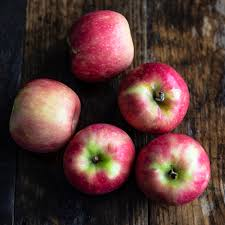

Scaled Image


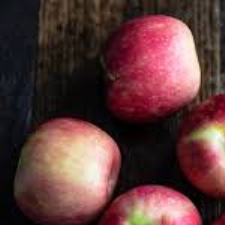

Rotated Image


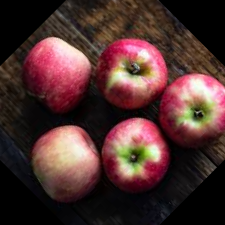

Translated Image


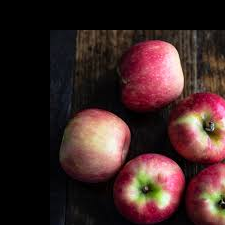

In [57]:
from google.colab.patches import cv2_imshow
# Example transformations
scaled_image = scale_image(image, 1.5)
rotated_image = rotate_image(image, 45)
translated_image = translate_image(image, 50, 30)

# Show the results
print('Original Image')
cv2_imshow(image)
print('Scaled Image')
cv2_imshow(scaled_image)
print('Rotated Image')
cv2_imshow(rotated_image)
print('Translated Image')
cv2_imshow(translated_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

 **4. Face Detection from Image Arrays – Extract facial features by
slicing a NumPy-based image array.**

Face Region:


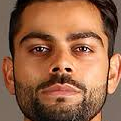

Eye Region:


Eye Region:


Detected Faces


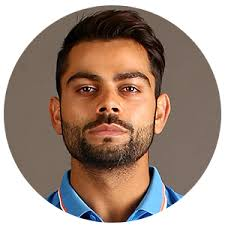

In [63]:
import cv2
import numpy as np

# Load an image and convert it to a NumPy array
image = cv2.imread('image.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Load OpenCV's pre-trained Haar Cascade for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_frontalface_default.xml')

# Detect faces in the image
faces = face_cascade.detectMultiScale(image_gray, scaleFactor=1.1,minNeighbors=5)

# Loop through the detected faces and extract facial features (regions)
for (x, y, w, h) in faces:
# Slice the image array to extract the face region
  face_region = image[y:y+h, x:x+w]
# Display the face region
  print('Face Region:')
  cv2_imshow(face_region)

# Extract additional facial features
eyes_cascade = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_eye.xml')
eyes = eyes_cascade.detectMultiScale(face_region, scaleFactor=1.1,minNeighbors=5)
for (ex, ey, ew, eh) in eyes:
  eye_region = face_region[ey:ey+eh, ex:ex+ew]
  print('Eye Region:')
  cv2_imshow(eye_region)

# Show the original image with detected faces
print('Detected Faces')
cv2_imshow( image)
cv2.waitKey(0)
cv2.destroyAllWindows()
